# Bibliotheken

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.base import BaseEstimator, TransformerMixin
from pipe_tools.pipe_visualizer import plot_pipeline

# Daten Laden

In [2]:
labelList=['symboling','normalizedLosses','make','fuelType','aspiration','numOfDoors','bodyStyle','driveWheels','engineLocation',
           'wheelBase','length','width','height','curbWeight','engineType','numOfCylinders','engineSize','fuelSystem','bore',
           'stroke','compressionRatio','horsepower','peakRpm','cityMpg','highwayMpg','price']
df = pd.read_csv('../data/data_car-CopyForEDA.csv',delimiter=',',encoding='utf-8', names=labelList)
# Datentypen umwandeln & ? durch np.NAN ersetzen
df = df.replace("?", np.nan)
df[['normalizedLosses']]=df[['normalizedLosses']].astype('category')
df[['price']]=df[['price']].astype('float64')
df[['horsepower']]=df[['horsepower']].astype('float64')
df[['peakRpm']]=df[['peakRpm']].astype('float64')
df[['bore']]=df[['bore']].astype('float64')
df[['stroke']]=df[['stroke']].astype('float64')
df[['engineSize']]=df[['engineSize']].astype('float64')
df[['cityMpg']]=df[['cityMpg']].astype('float64')
df[['highwayMpg']]=df[['highwayMpg']].astype('float64')
df[['curbWeight']]=df[['curbWeight']].astype('float64')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling           205 non-null int64
normalizedLosses    164 non-null category
make                205 non-null object
fuelType            205 non-null object
aspiration          205 non-null object
numOfDoors          203 non-null object
bodyStyle           205 non-null object
driveWheels         205 non-null object
engineLocation      205 non-null object
wheelBase           205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curbWeight          205 non-null float64
engineType          205 non-null object
numOfCylinders      205 non-null object
engineSize          205 non-null float64
fuelSystem          205 non-null object
bore                201 non-null float64
stroke              201 non-null float64
compressionRatio    205 non-null float64
horsepower          203 non-null float64
peak

In [4]:
#Tests /DummyEncoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[['make']])
ohe.fit_transform(df[['fuelType']])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

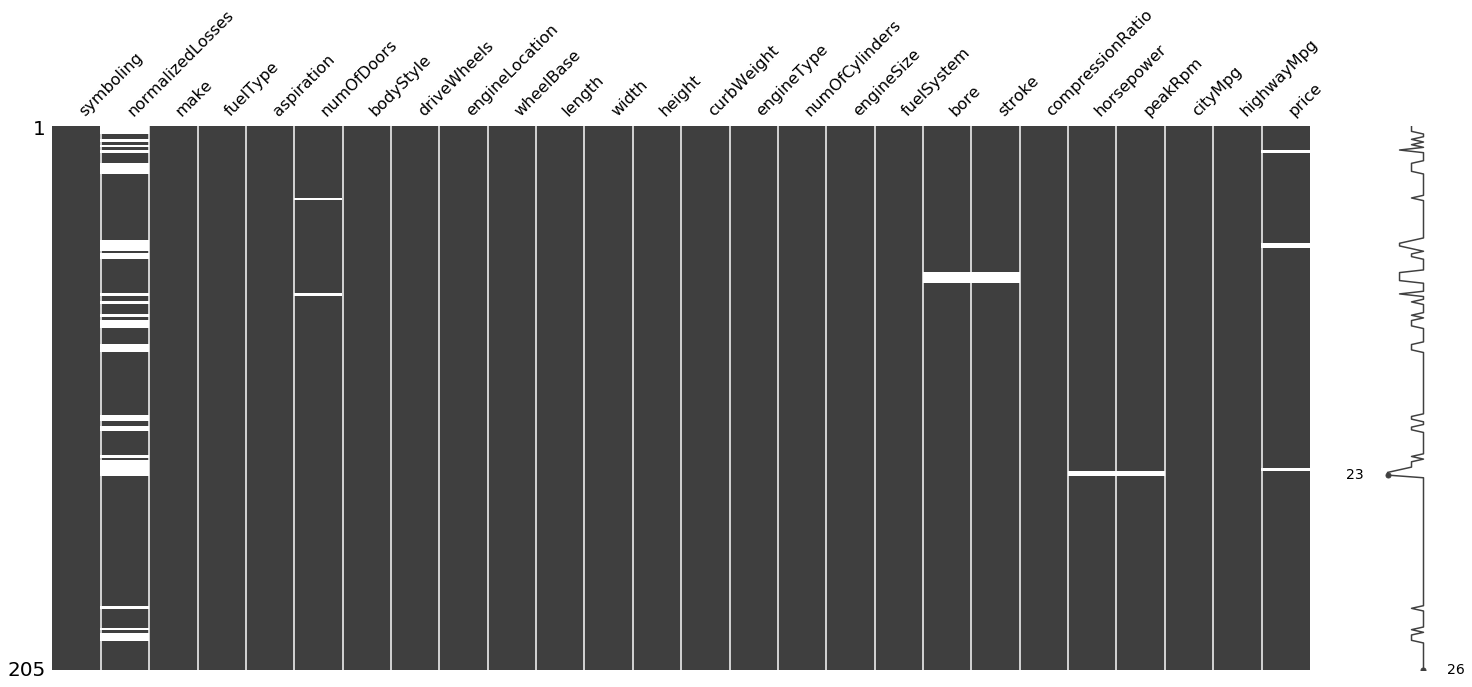

In [5]:
# show all nan-Values
msno.matrix(df)

# horizontaler und vertikaler Cut

In [6]:
output_features = [
    "symboling"
]

input_features = [
    'normalizedLosses',
    'make',
    'fuelType',
    'aspiration',
    'numOfDoors',
    'bodyStyle',
    'driveWheels',
    'engineLocation',
    'wheelBase',
    'length',
    'width',
    'height',
    'curbWeight',
    'engineType',
    'numOfCylinders',
    'engineSize',
    'fuelSystem',
    'bore',
    'stroke',
    'compressionRatio',
    'horsepower',
    'peakRpm',
    'cityMpg',
    'highwayMpg',
    'price'
]

train_X, test_X, train_y, test_y = train_test_split(
    df[input_features], 
    df[output_features],
    test_size=0.2
)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((164, 25), (41, 25), (164, 1), (41, 1))

# Helper-Function

In [7]:
def debug_print(X, debug):
    """This method prints some debug information based on a debug parameter."""
    if not debug in ["input", "shape", "columns", False]:
        raise ValueError("Debug parameter value is not valied.")
    elif debug=="input":
        print(X.head(5))
    elif debug=="shape":
        print(X.shape)
    elif debug=="columns":
        print(X.columns)
    elif debug is False:
        pass

# Selectoren

## Column-Selector

In [8]:
from sklearn.pipeline import Pipeline
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

In [9]:
a = [1,2]
b = [3,5]
c = a+b
print(c)

[1, 2, 3, 5]


## Type-Selector

In [10]:
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

In [11]:
#test
ts = TypeSelector("object")
print(type(ts))
ts.fit_transform(test_X).head()

<class '__main__.TypeSelector'>


,make,fuelType,aspiration,numOfDoors,bodyStyle,driveWheels,engineLocation,engineType,numOfCylinders,fuelSystem
37,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
107,peugot,gas,std,four,sedan,rwd,front,l,four,mpfi
85,mitsubishi,gas,std,four,sedan,fwd,front,ohc,four,2bbl
57,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
122,plymouth,gas,std,four,sedan,fwd,front,ohc,four,2bbl


In [12]:
# Custom Estimatoren

In [13]:
class PriceImputer():
    """Imputs Price with median price of car-Brand."""

    def __init__(self, debug=False):
        self.d = debug
        self.colnames = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df.price = df.groupby(['make'])['price'].apply(lambda x: x.fillna(x.median()))
        self.colnames = df.columns.tolist()
        return df
    
    def get_feature_names(self):
        return self.colnames 

In [14]:
class numOfDoorsImputer():
    
    """Imputs numOfDoor with modus of body-Style."""
    def __init__(self, debug=False):
        self.d = debug
        self.colnames = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        debug_print(X=X, debug=self.d)
        #df = X.copy()

        df.numOfDoors = df.groupby(['bodyStyle'])['numOfDoors'].apply(lambda x: x.fillna(x.mode().iloc[0]))
        self.colnames = df.columns.tolist()
        return df
    
    def get_feature_names(self):
        return self.colnames 

In [33]:
class OHE():
    """Imputs Price with median price of car-Brand."""

    def __init__(self, debug=False):
        self.d = debug
        self.colnames = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        interimLabelListdf = X.select_dtypes(include='object')
        interimLabelList = list(interimLabelListdf.columns)
        print(type(interimLabelList))
        print(interimLabelList)
        
        
        ohe = OneHotEncoder(sparse=False)
        #print(X.info())
        npArray = ohe.fit_transform(X[interimLabelList])
        #print(npArray.shape)
        #print(ohe.categories_)
        #print(type(ohe.categories_))
        titles = []
        for singleList in ohe.categories_:
            titles = titles + list(singleList)
        interimDF = pd.DataFrame(data = npArray, columns=titles)
        
        df = pd.concat([X, interimDF], axis=1, sort=False)
        print(df)
        return df
    
    def get_feature_names(self):
        return self.colnames 

In [34]:
interimLabelList = df.select_dtypes(include='object')
list(interimLabelList.columns)

['make',
 'fuelType',
 'aspiration',
 'numOfDoors',
 'bodyStyle',
 'driveWheels',
 'engineLocation',
 'engineType',
 'numOfCylinders',
 'fuelSystem']

In [35]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[['make','engineType']])
ohe.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

# Pipeline

In [36]:
from sklearn.pipeline import Pipeline

class FeaturePipeline(Pipeline):
    def get_feature_names(self):
        return self.steps[-1][1].get_feature_names()

In [37]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

debug_state = False

pipe = FeaturePipeline(
    [

        ("price_imputation", PriceImputer(debug=False)),
        ("numOfDoors_imputation", numOfDoorsImputer(debug=False)),
        ("OHE", OHE(debug=False))
        
    ]
)

In [38]:
#train_X = train_X.drop(['normalizedLosses'], axis=1)

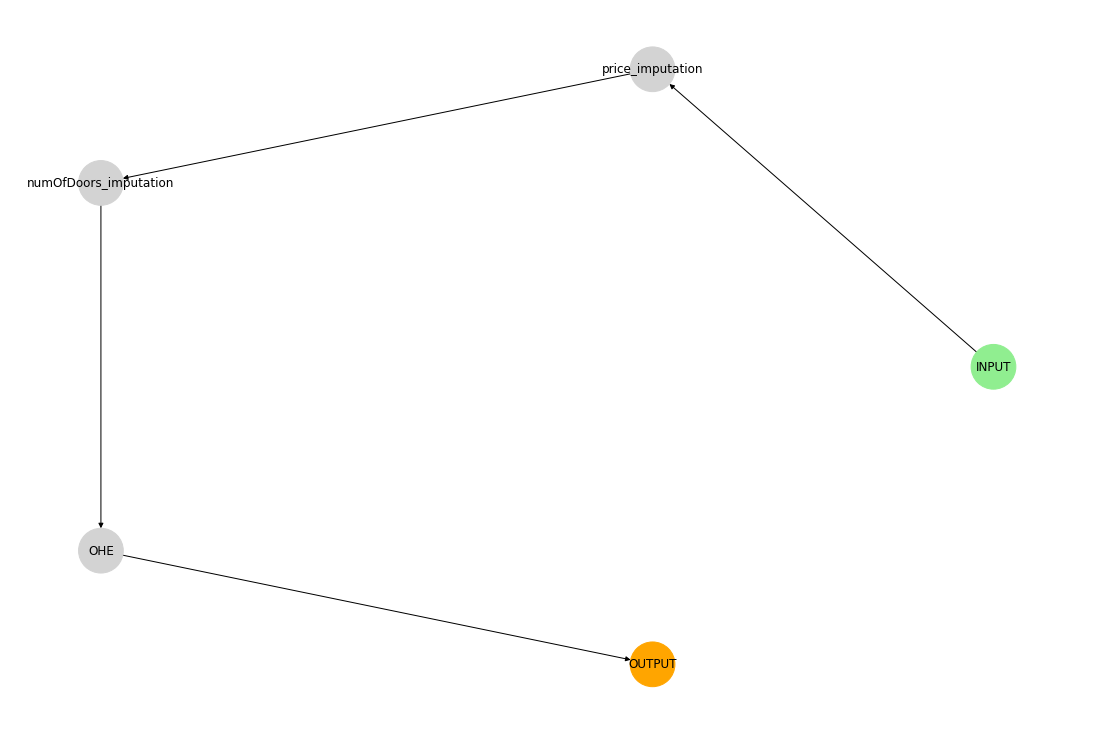

In [39]:
plot_pipeline(pipe, "pipeline_plot.png")

In [40]:
#print(train_X_prepared.isna().any())
train_X_prepared = pipe.fit(train_X)
train_X_prepared = pipe.transform(train_X)

#np.savetxt("foo.csv", train_X, delimiter=",")

<class 'list'>
['make', 'fuelType', 'aspiration', 'numOfDoors', 'bodyStyle', 'driveWheels', 'engineLocation', 'engineType', 'numOfCylinders', 'fuelSystem']
     symboling normalizedLosses         make fuelType aspiration numOfDoors  \
0            3              NaN  alfa-romero      gas        std        two   
1            3              NaN  alfa-romero      gas        std        two   
2            1              NaN  alfa-romero      gas        std        two   
3            2              164         audi      gas        std       four   
4            2              164         audi      gas        std       four   
..         ...              ...          ...      ...        ...        ...   
200         -1               95        volvo      gas        std       four   
201         -1               95        volvo      gas      turbo       four   
202         -1               95        volvo      gas        std       four   
203         -1               95        volvo   diesel 

In [42]:
preparedDataFrame = pd.DataFrame(train_X_prepared)
preparedDataFrame.to_csv(r'test.csv')